In [4]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
consumerKey = 'cjkRvHziFQSpev18Vz507sXZx'
consumerSecret = 'B8Ra5AIbRlroK1IJo07dRApLLksDUGLeOM9tatnNRVKTdkVGnd'
accessToken = '816895657042538496-VcpVnZrNAabgNEKpVTHey89MTURyOrt'
accessTokenSecret = 'iZv18sZpf39zbGHQaM9LHnT12IGmWC1XlYL78Yi5BKn6c'

In [6]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [7]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="realDonaldTrump", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) RT @realDonaldTrump: HISTORIC JOBS NUMBERS! #MAGA 
https://t.co/ncAkWV0D2c

2) https://t.co/qC5qXAXBlm

3) https://t.co/ZIltni5X59

4) JOBS, JOBS, JOBS! #MAGA https://t.co/W3Ify8K2tH

5) HISTORIC JOBS NUMBERS! #MAGA 
https://t.co/ncAkWV0D2c



In [8]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,RT @realDonaldTrump: HISTORIC JOBS NUMBERS! #M...
1,https://t.co/qC5qXAXBlm
2,https://t.co/ZIltni5X59
3,"JOBS, JOBS, JOBS! #MAGA https://t.co/W3Ify8K2tH"
4,HISTORIC JOBS NUMBERS! #MAGA \nhttps://t.co/nc...


In [9]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,: HISTORIC JOBS NUMBERS! MAGA \n
1,
2,
3,"JOBS, JOBS, JOBS! MAGA"
4,HISTORIC JOBS NUMBERS! MAGA \n
...,...
95,
96,"Sorry to inform the Do Nothing Democrats, but ..."
97,"Seattle Looters, Agitators, Anarchists and “Pr..."
98,95% Approval Rating of President Trump in the ...


In [10]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,: HISTORIC JOBS NUMBERS! MAGA \n,0.000000,0.000000
1,,0.000000,0.000000
2,,0.000000,0.000000
3,"JOBS, JOBS, JOBS! MAGA",0.000000,0.000000
4,HISTORIC JOBS NUMBERS! MAGA \n,0.000000,0.000000
...,...,...,...
95,,0.000000,0.000000
96,"Sorry to inform the Do Nothing Democrats, but ...",0.636000,0.125750
97,"Seattle Looters, Agitators, Anarchists and “Pr...",0.600000,-0.437500
98,95% Approval Rating of President Trump in the ...,0.557792,0.137338


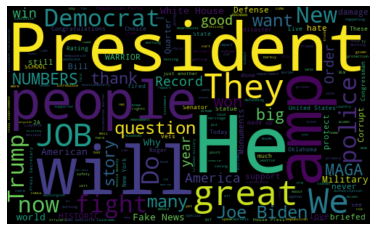

In [11]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [12]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,: HISTORIC JOBS NUMBERS! MAGA \n,0.000000,0.000000,Neutral
1,,0.000000,0.000000,Neutral
2,,0.000000,0.000000,Neutral
3,"JOBS, JOBS, JOBS! MAGA",0.000000,0.000000,Neutral
4,HISTORIC JOBS NUMBERS! MAGA \n,0.000000,0.000000,Neutral
...,...,...,...,...
95,,0.000000,0.000000,Neutral
96,"Sorry to inform the Do Nothing Democrats, but ...",0.636000,0.125750,Positive
97,"Seattle Looters, Agitators, Anarchists and “Pr...",0.600000,-0.437500,Negative
98,95% Approval Rating of President Trump in the ...,0.557792,0.137338,Positive


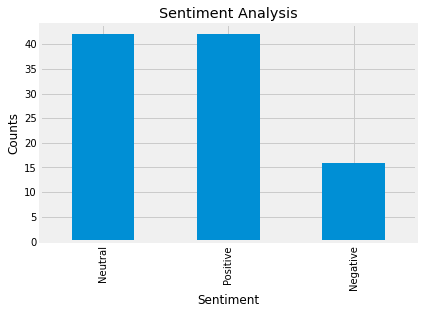

In [13]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()